In [1]:
# Load the Drive helper and mount
#from google.colab import drive
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# This will prompt for authorization.
#drive.mount('/content/drive')


In [2]:
import pandas as pd
import numpy as np
relative_activity_period = 1
relative_screen_period = 1
data = pd.read_csv('dataset_mood_smartphone.csv')
data.time = pd.to_datetime(data.time)
data = data.set_index('time')
df = pd.DataFrame(data[data.variable == 'mood'].value)
df= df.rename(columns = {'value': 'mood'})
df['id'] = data[data.variable == 'mood'].id

df= df.reset_index().drop_duplicates(subset = ['time','id'], keep ='last').set_index('time')
df_valence = data[data.variable == 'circumplex.valence']
df_valence = df_valence.reset_index().drop_duplicates(subset = ['time','id'], keep ='last').set_index('time')
df_arousal = data[data.variable== 'circumplex.arousal']
df_arousal = df_arousal.reset_index().drop_duplicates(subset = ['time','id'], keep ='last').set_index('time')
df['RM_activity'] = np.NaN
df['RM_screen'] = np.NaN
df['circumplex_valence']= np.NaN
df['circumplex_arousal'] = np.NaN
df['calls_last_hour'] = np.NaN
df['sms_last_hour'] = np.NaN
df['builtin'] = np.NaN
df['communication'] = np.NaN
df['entertainment'] = np.NaN
df['finance'] = np.NaN
df['game'] = np.NaN
df['office'] = np.NaN
df['other'] = np.NaN
df['social'] = np.NaN
df['travel'] = np.NaN
df['unknown'] = np.NaN
df['utilities'] = np.NaN
df['weather'] = np.NaN
df['prior_mood'] = np.NaN
for user in data.id.unique():
  df.loc[(df.id == user), 'prior_mood'] = df[df.id == user].mood.shift()
  df.loc[(df.id == user), 'prior2_mood'] = df[df.id == user].mood.shift(2)
  df.loc[(df.id == user), 'prior3_mood'] = df[df.id == user].mood.shift(3)
  df.loc[(df.id == user), 'prior4_mood'] = df[df.id == user].mood.shift(4)
  df.loc[(df.id == user), 'prior5_mood'] = df[df.id == user].mood.shift(5)
  df.loc[(df.id == user), 'prior6_mood'] = df[df.id == user].mood.shift(6)
  df.loc[(df.id == user), 'prior7_mood'] = df[df.id == user].mood.shift(7)
  df.loc[(df.id == user), 'prior8_mood'] = df[df.id == user].mood.shift(8)
  df.loc[(df.id == user), 'prior9_mood'] = df[df.id == user].mood.shift(9)
  df.loc[(df.id == user), 'prior10_mood'] = df[df.id == user].mood.shift(10)
  df.loc[(df.id == user), 'prio11_mood'] = df[df.id == user].mood.shift(11)
  df.loc[(df.id == user), 'prior12_mood'] = df[df.id == user].mood.shift(12)
  df.loc[(df.id == user), 'prior_mood_mean'] = df[df.id == user].mood.rolling(5).mean().shift()
  df.loc[(df.id == user), 'prior_mood_var'] = df[df.id == user].mood.rolling(5).var().shift()

  user_data = data[data.id == user]
  activity_user = user_data[user_data.variable == 'activity']
  activity_user['RM_activity'] = activity_user.value.rolling(window=relative_activity_period).mean().shift()
  df.loc[df.id == user, 'RM_activity'] = df[df.id == user].drop('RM_activity', axis=1).join(activity_user.RM_activity)
  data_screen = pd.pivot_table(data[(data.variable =='screen') & (data.id == user)], values='value', index=['time'],columns='variable')
  screen_user = data_screen.resample('1H').sum()
  screen_user['RM_screen'] = screen_user.screen.rolling(window=relative_screen_period).mean().shift()
  df.loc[df.id == user, 'RM_screen'] = df[df.id == user].drop('RM_screen', axis=1).join(screen_user.RM_screen)
  valence_user = df_valence[df_valence.id == user]
  df.loc[df.id == user, 'circumplex_valence'] = df[df.id == user].drop(['circumplex_valence','id'], axis=1).join(valence_user.value).value
  arousal_user = df_arousal[df_arousal.id == user]
  df.loc[df.id == user, 'circumplex_arousal'] = df[df.id == user].drop(['circumplex_arousal','id'], axis=1).join(arousal_user.value).value
  
  call_user = user_data[user_data.variable == 'call'].resample('1H').sum().shift()
  call_user['calls_last_hour'] = call_user.value
  df.loc[df.id == user, 'calls_last_hour'] = df[df.id == user].drop('calls_last_hour', axis=1).join(call_user.calls_last_hour)

  sms_user = user_data[user_data.variable == 'sms'].resample('1H').sum().shift()
  sms_user['sms_last_hour'] = sms_user.value
  df.loc[df.id == user, 'sms_last_hour'] = df[df.id == user].drop('sms_last_hour', axis=1).join(sms_user.sms_last_hour)

  builtin_user = user_data[user_data.variable == 'appCat.builtin'].resample('1H').sum().shift()
  builtin_user['builtin'] = builtin_user.value
  df.loc[df.id == user, 'builtin'] = df[df.id == user].drop('builtin', axis=1).join(builtin_user.builtin)

  communication_user = user_data[user_data.variable == 'appCat.communication'].resample('1H').sum().shift()
  communication_user['communication'] = communication_user.value
  df.loc[df.id == user, 'communication'] = df[df.id == user].drop('communication', axis=1).join(communication_user.communication)

  entertainment_user = user_data[user_data.variable == 'appCat.entertainment'].resample('1H').sum().shift()
  entertainment_user['entertainment'] = entertainment_user.value
  df.loc[df.id == user, 'entertainment'] = df[df.id == user].drop('entertainment', axis=1).join(entertainment_user.entertainment)

  finance_user = user_data[user_data.variable == 'appCat.finance'].resample('1H').sum().shift()
  finance_user['finance'] = finance_user.value
  df.loc[df.id == user, 'finance'] = df[df.id == user].drop('finance', axis=1).join(finance_user.finance)

  game_user = user_data[user_data.variable == 'appCat.game'].resample('1H').sum().shift()
  game_user['game'] = game_user.value
  df.loc[df.id == user, 'game'] = df[df.id == user].drop('game', axis=1).join(game_user.game)

  office_user = user_data[user_data.variable == 'appCat.office'].resample('1H').sum().shift()
  office_user['office'] = office_user.value
  df.loc[df.id == user, 'office'] = df[df.id == user].drop('office', axis=1).join(office_user.office)

  other_user = user_data[user_data.variable == 'appCat.other'].resample('1H').sum().shift()
  other_user['other'] = other_user.value
  df.loc[df.id == user, 'other'] = df[df.id == user].drop('other', axis=1).join(other_user.other)

  social_user = user_data[user_data.variable == 'appCat.social'].resample('1H').sum().shift()
  social_user['social'] = social_user.value
  df.loc[df.id == user, 'social'] = df[df.id == user].drop('social', axis=1).join(social_user.social)

  travel_user = user_data[user_data.variable == 'appCat.travel'].resample('1H').sum().shift()
  travel_user['travel'] = travel_user.value
  df.loc[df.id == user, 'travel'] = df[df.id == user].drop('travel', axis=1).join(travel_user.travel)

  unknown_user = user_data[user_data.variable == 'appCat.unknown'].resample('1H').sum().shift()
  unknown_user['unknown'] = unknown_user.value
  df.loc[df.id == user, 'unknown'] = df[df.id == user].drop('unknown', axis=1).join(unknown_user.unknown)

  utilities_user = user_data[user_data.variable == 'appCat.utilities'].resample('1H').sum().shift()
  utilities_user['utilities'] = utilities_user.value
  df.loc[df.id == user, 'utilities'] = df[df.id == user].drop('utilities', axis=1).join(utilities_user.utilities)

  weather_user = user_data[user_data.variable == 'appCat.weather'].resample('1H').sum().shift()
  weather_user['weather'] = weather_user.value
  df.loc[df.id == user, 'weather'] = df[df.id == user].drop('weather', axis=1).join(weather_user.weather)
df


C:\Users\Alex Korthouwer\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,mood,id,RM_activity,RM_screen,circumplex_valence,circumplex_arousal,calls_last_hour,sms_last_hour,builtin,communication,...,prior5_mood,prior6_mood,prior7_mood,prior8_mood,prior9_mood,prior10_mood,prio11_mood,prior12_mood,prior_mood_mean,prior_mood_var
time,,,,,,,,,,,,,,,,,,,,,
2014-02-26 13:00:00,6.0,AS14.01,NaN,NaN,0.0,-1.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-26 15:00:00,6.0,AS14.01,NaN,NaN,1.0,-1.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-26 18:00:00,6.0,AS14.01,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-26 21:00:00,7.0,AS14.01,NaN,NaN,1.0,1.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-27 09:00:00,6.0,AS14.01,NaN,NaN,0.0,-2.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-30 09:00:00,8.0,AS14.33,0.000000,0.000,1.0,1.0,0.0,NaN,0.000,0.000,...,6.0,7.0,9.0,10.0,9.0,7.0,6.0,5.0,6.6,0.3
2014-05-30 13:00:00,6.0,AS14.33,0.620968,639.424,0.0,0.0,0.0,NaN,151.381,97.060,...,7.0,6.0,7.0,9.0,10.0,9.0,7.0,6.0,7.0,0.5
2014-05-30 19:00:00,8.0,AS14.33,0.250000,0.000,-1.0,-2.0,NaN,NaN,0.000,0.000,...,7.0,7.0,6.0,7.0,9.0,10.0,9.0,7.0,6.8,0.7


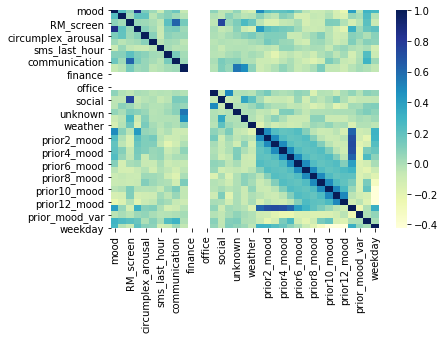

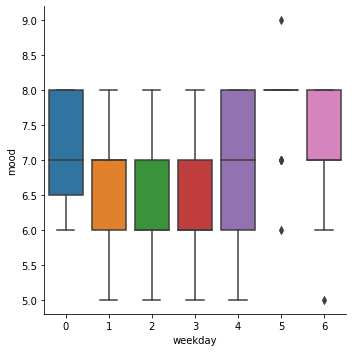

In [3]:
import seaborn as sns
#df.fillna(value=np.nan, inplace=True)
df['time'] = df.index.hour
df['weekday'] = df.index.weekday
corrplot = df[df.id == 'AS14.26'].drop(['id'], axis =1).corr()
sns.heatmap(corrplot, cmap="YlGnBu")
sns.catplot(x='weekday', y= 'mood', kind = 'box', data = df[df.id == 'AS14.26'])
#df.describe()

In [4]:
#making train test split
!pip install portion
import portion as p
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.id = le.fit_transform(df.id)
test_df = pd.DataFrame()
train_df = pd.DataFrame()
val_df = pd.DataFrame()
for user in df.id.unique():
  val_min = df[df.id == user].index.dayofyear.unique()[np.floor(0.6*len(df[df.id == user].index.dayofyear.unique()))]
  val_max = df[df.id == user].index.dayofyear.unique()[np.floor(0.8*len(df[df.id == user].index.dayofyear.unique()))]
  test_user = df[(df.id == user) & (df.index.dayofyear > val_max)]
  test_df = test_df.append(test_user)
  train_user = df[(df.id == user) & (df.index.dayofyear <= val_min)]
  train_df = train_df.append(train_user)
  val_user = df[(df.id == user) &(df.index.dayofyear>val_min) & (df.index.dayofyear<= val_max)]
  val_df = val_df.append(val_user)

  

In [5]:

x_train =  train_df.drop('mood', axis = 1)
y_train = train_df['mood']
x_test = test_df.drop('mood', axis = 1)
y_test = test_df['mood']
x_val =  val_df.drop('mood', axis = 1)
y_val = val_df['mood']

x_train

,id,RM_activity,RM_screen,circumplex_valence,circumplex_arousal,calls_last_hour,sms_last_hour,builtin,communication,entertainment,...,prior7_mood,prior8_mood,prior9_mood,prior10_mood,prio11_mood,prior12_mood,prior_mood_mean,prior_mood_var,time,weekday
time,,,,,,,,,,,,,,,,,,,,,
2014-02-26 13:00:00,0,NaN,NaN,0.0,-1.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,2
2014-02-26 15:00:00,0,NaN,NaN,1.0,-1.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,2
2014-02-26 18:00:00,0,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,2
2014-02-26 21:00:00,0,NaN,NaN,1.0,1.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,2
2014-02-27 09:00:00,0,NaN,NaN,0.0,-2.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-14 09:00:00,26,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.0,4.0,6.0,6.0,8.0,6.0,6.0,3.5,9,2
2014-05-14 13:00:00,26,0.000,19.485,0.0,0.0,0.0,0.0,19.474,0.000,0.000,...,7.0,5.0,4.0,6.0,6.0,8.0,6.0,3.5,13,2
2014-05-14 17:00:00,26,0.000,0.000,1.0,-2.0,0.0,0.0,0.000,0.000,0.000,...,6.0,7.0,5.0,4.0,6.0,6.0,6.2,3.7,17,2


In [6]:
user = 'AS14.05'
!pip install xgboost
import xgboost as xgb
import time

start = time.time()
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10)
xg_reg.fit(x_train[x_train.id == user].drop('id', axis =1),y_train[x_train.id == user])
end = time.time()
print(end - start)



C:\Users\Alex Korthouwer\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


[23:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:58: Label set is empty.
[23:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:58: Label set is empty.
[23:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:58: Label set is empty.
[23:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:58: Label set is empty.
[23:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:58: Label set is empty.
[23:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:58: Label set is empty.
[23:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:58: Label set is empty.
[23:04:26] WARNING: C:/Users/Administrato

In [7]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
sfs1 = SFS(xg_reg, 
           k_features=6, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv= 3)
#sfs1 = sfs1.fit(x_train.drop('id',axis = 1), y_train)
#fig = plot_sfs(sfs1.get_metric_dict(), kind='std_err')

In [8]:
colsample_bytree = [0.1, 0.3, 0.5,0.7, 0.9]
learning_rate = [0.25, 0.5, 0.75, 1]
max_depth = [ 7 , 10 , 12]
n_estimators = [15,16,17,]
k_features=[2,4,5,6,7]
params = {'xg_reg__colsample_bytree': colsample_bytree,
              'xg_reg__learning_rate': learning_rate,
              'xg_reg__max_depth':max_depth,
           'xg_reg__n_estimators' : n_estimators,
          'sfs__k_features':k_features
}

from sklearn.pipeline import Pipeline
pipe = Pipeline([('sfs', sfs1), 
                 ('xg_reg', xg_reg)])

In [9]:

import time
from hypopt import GridSearch
print('reached')
start = time.time()
pipe = Pipeline([('sfs', sfs1), 
                 ('xg_reg', xg_reg)])
grid_search = GridSearch(pipe, num_threads =4)
grid_search.fit(x_train, y_train,params,x_val, y_val, verbose =10 )
end = time.time()
print(end - start)

reached
Comparing 900 parameter setting(s) using 4 CPU thread(s) ( 225 job(s) per thread ).
17379.518397331238


In [10]:
grid_search.get_param_scores()[0:5]


[({'sfs__k_features': 7,
   'xg_reg__colsample_bytree': 0.9,
   'xg_reg__learning_rate': 0.75,
   'xg_reg__max_depth': 7,
   'xg_reg__n_estimators': 15},
  0.6145555916611807),
 ({'sfs__k_features': 7,
   'xg_reg__colsample_bytree': 0.9,
   'xg_reg__learning_rate': 0.75,
   'xg_reg__max_depth': 7,
   'xg_reg__n_estimators': 17},
  0.613582074410948),
 ({'sfs__k_features': 7,
   'xg_reg__colsample_bytree': 0.9,
   'xg_reg__learning_rate': 0.75,
   'xg_reg__max_depth': 7,
   'xg_reg__n_estimators': 16},
  0.613582074410948),
 ({'sfs__k_features': 7,
   'xg_reg__colsample_bytree': 0.7,
   'xg_reg__learning_rate': 0.75,
   'xg_reg__max_depth': 10,
   'xg_reg__n_estimators': 17},
  0.6112172191006346),
 ({'sfs__k_features': 7,
   'xg_reg__colsample_bytree': 0.7,
   'xg_reg__learning_rate': 0.75,
   'xg_reg__max_depth': 12,
   'xg_reg__n_estimators': 17},
  0.6110653486437498)]

In [25]:
grid_search.model.fit(x_train.append(x_val), y_train.append(y_val))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    6.4s finished

[2020-04-19 09:12:45] Features: 1/7 -- score: 0.4740232665449699[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    8.3s finished

[2020-04-19 09:12:53] Features: 2/7 -- score: 0.534053911355249[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   10.3s finished

[2020-04-19 09:13:04] Features: 3/7 -- score: 0.5614293791067971[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

Pipeline(memory=None,
         steps=[('sfs',
                 SequentialFeatureSelector(clone_estimator=True, cv=3,
                                           estimator=XGBRegressor(alpha=10,
                                                                  base_score=0.5,
                                                                  booster=None,
                                                                  colsample_bylevel=1,
                                                                  colsample_bynode=1,
                                                                  colsample_bytree=0.9,
                                                                  gamma=0,
                                                                  gpu_id=-1,
                                                                  importance_type='gain',
                                                                  interaction_constraints=None,
                                              

In [26]:
grid_search.model.steps[0][1].subsets_

{1: {'feature_idx': (3,),
  'cv_scores': array([0.55326342, 0.4312554 , 0.43755098]),
  'avg_score': 0.4740232665449699,
  'feature_names': ('circumplex_valence',)},
 2: {'feature_idx': (3, 31),
  'cv_scores': array([0.58853315, 0.49343096, 0.52019762]),
  'avg_score': 0.534053911355249,
  'feature_names': ('circumplex_valence', 'prior_mood_mean')},
 3: {'feature_idx': (0, 3, 31),
  'cv_scores': array([0.60222417, 0.54177097, 0.54029299]),
  'avg_score': 0.5614293791067971,
  'feature_names': ('id', 'circumplex_valence', 'prior_mood_mean')},
 4: {'feature_idx': (0, 3, 4, 31),
  'cv_scores': array([0.61114394, 0.54636405, 0.55412437]),
  'avg_score': 0.5705441215877658,
  'feature_names': ('id',
   'circumplex_valence',
   'circumplex_arousal',
   'prior_mood_mean')},
 5: {'feature_idx': (0, 3, 4, 19, 31),
  'cv_scores': array([0.60990387, 0.54836714, 0.55524982]),
  'avg_score': 0.5711736100394497,
  'feature_names': ('id',
   'circumplex_valence',
   'circumplex_arousal',
   'prior_mo

In [27]:
grid_search.model.predict(x_test)

array([7.4946065, 7.335218 , 7.4761453, ..., 4.688578 , 4.735164 ,
       6.5621834], dtype=float32)

In [28]:
yPlot = pd.DataFrame(y_test)

In [29]:
yPlot['pred'] = grid_search.model.predict(x_test)

In [30]:
yPlot['id'] = x_test.id

In [31]:
daily_pred = yPlot.groupby( [ yPlot.id,yPlot.index.dayofyear]).mean()
daily_pred = daily_pred.reset_index()
daily_pred

,id,time,mood,pred
0,0,116,7.6,7.446770
1,0,117,7.5,7.518635
2,0,118,7.6,7.368750
3,0,119,7.0,7.350372
4,0,120,7.8,7.267901
...,...,...,...,...
234,26,147,6.2,6.378971
235,26,148,8.2,7.876646
236,26,149,7.0,6.984994
237,26,150,6.8,5.632658


In [34]:
daily_pred['SQR_Error'] =(daily_pred.mood - daily_pred.pred)**2
np.sqrt(daily_pred.groupby('id').mean().SQR_Error).mean()

0.37725152191450917

In [19]:
yPlot['sqrtdiffpred'] = yPlot[['mood', 'pred']].apply(np.diff, axis =1)**2

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(yPlot['mood'], yPlot['pred'])

0.3786256764437025

In [21]:
x_test.isna().sum()

id                      0
RM_activity           250
RM_screen             125
circumplex_valence     49
circumplex_arousal     12
calls_last_hour       308
sms_last_hour         485
builtin               141
communication         135
entertainment         339
finance               774
game                  803
office                701
other                 186
social                229
travel                460
unknown               572
utilities             463
weather               856
prior_mood              0
prior2_mood             0
prior3_mood             0
prior4_mood             0
prior5_mood             0
prior6_mood             0
prior7_mood             0
prior8_mood             0
prior9_mood             0
prior10_mood            0
prio11_mood             0
prior12_mood            0
prior_mood_mean         0
prior_mood_var          0
time                    0
weekday                 0
dtype: int64

In [22]:
(x_test.isna().sum() / len(x_test))[(x_test.isna().sum() / len(x_test)) > 0.5]

finance    0.772455
game       0.801397
office     0.699601
unknown    0.570858
weather    0.854291
dtype: float64